In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset=pd.read_csv('train.csv')
pd.pandas.set_option('display.max_columns',None)

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
features_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

for feature in features_with_na:
    print(feature,np.round(dataset[feature].isnull().mean(),4),'% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


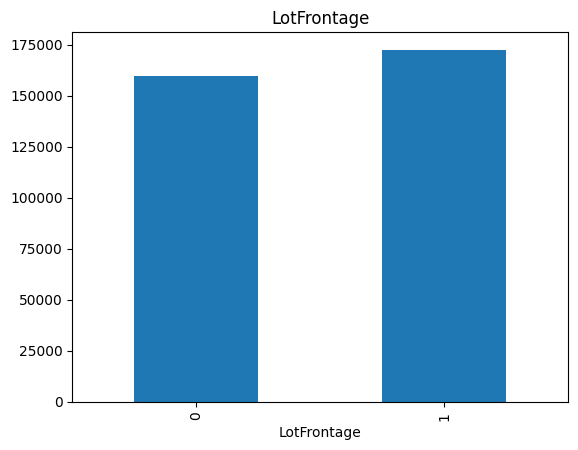

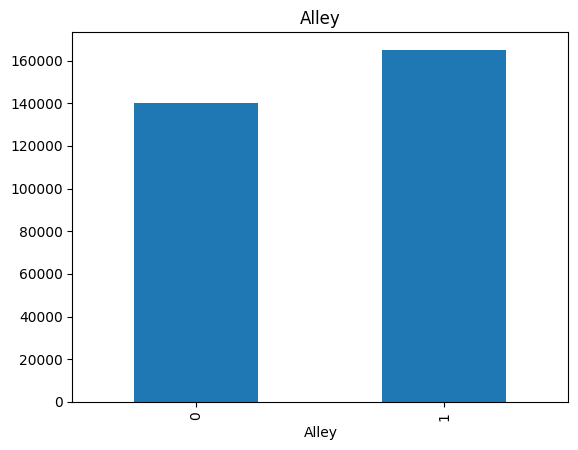

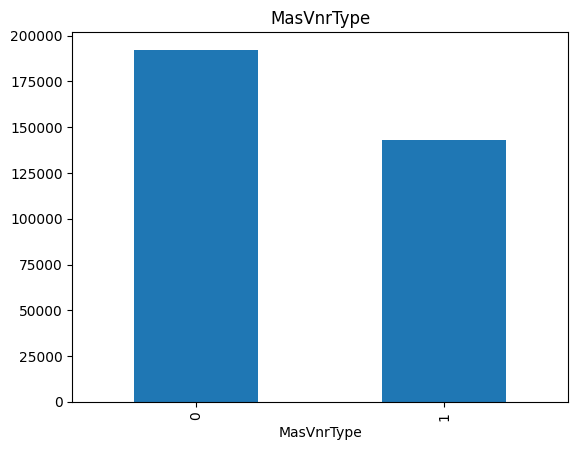

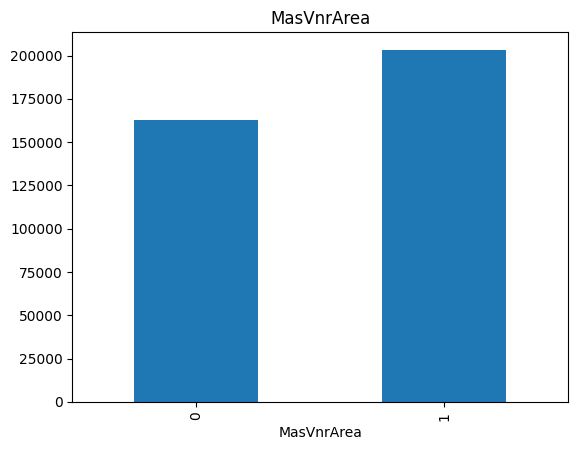

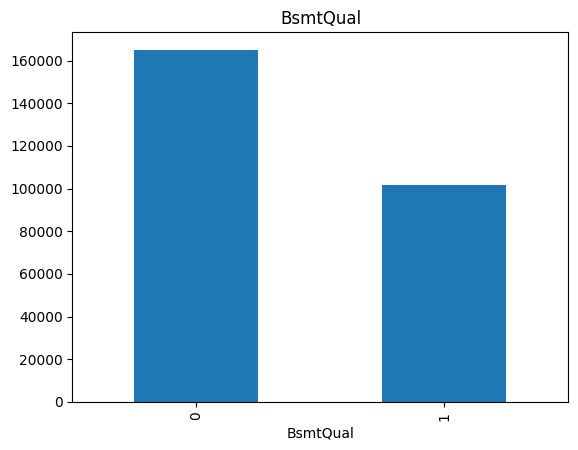

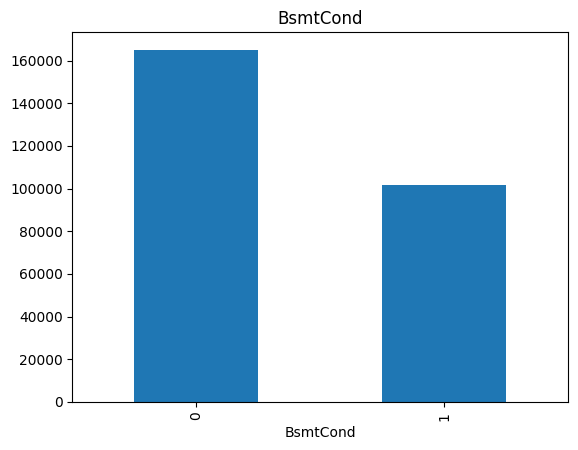

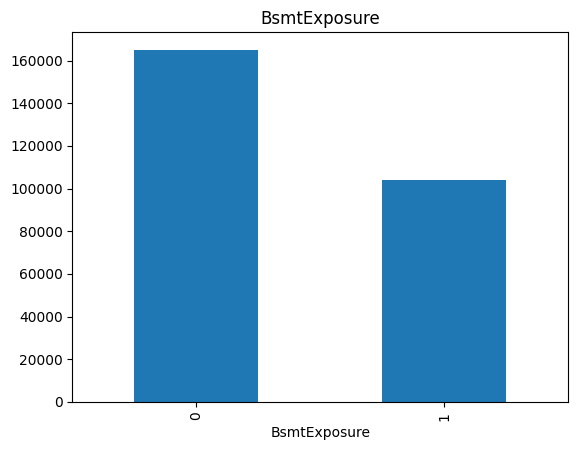

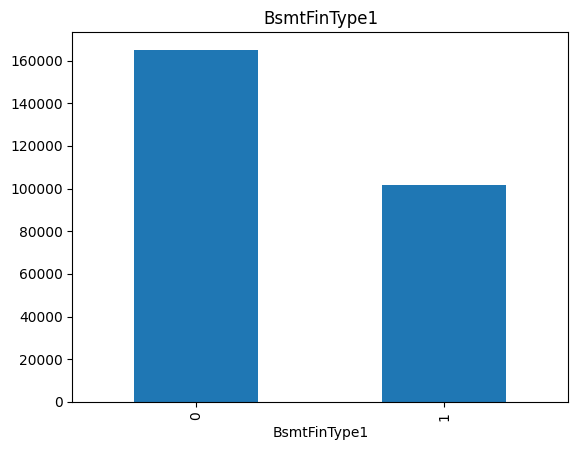

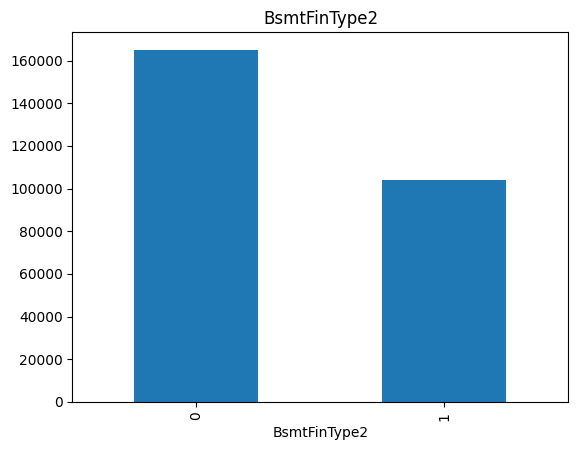

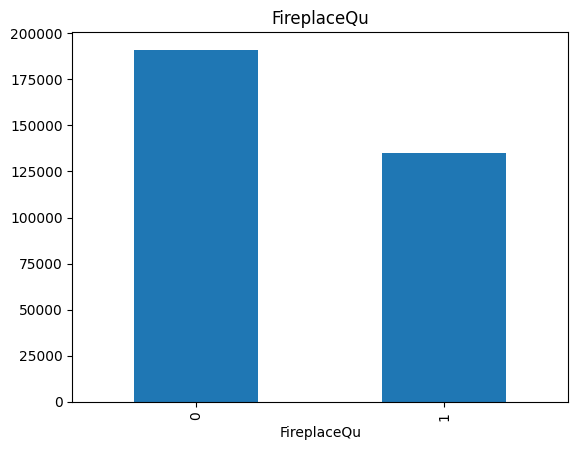

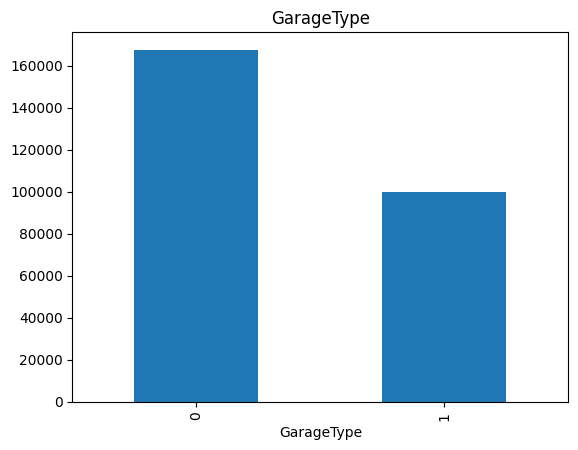

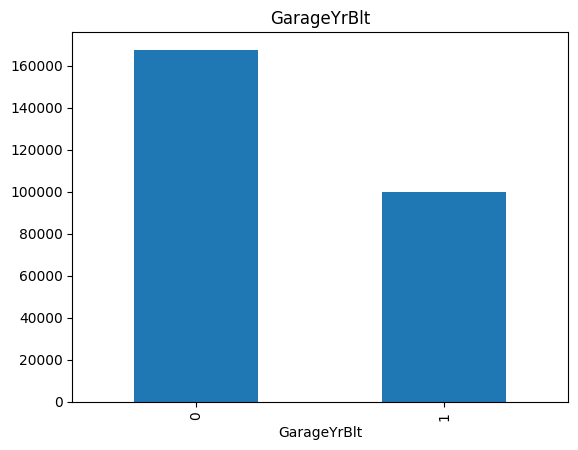

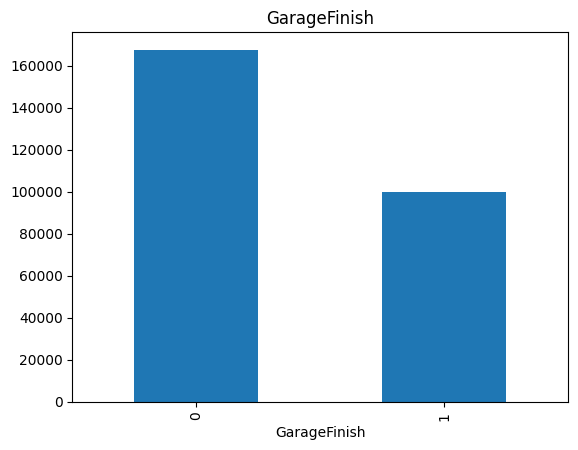

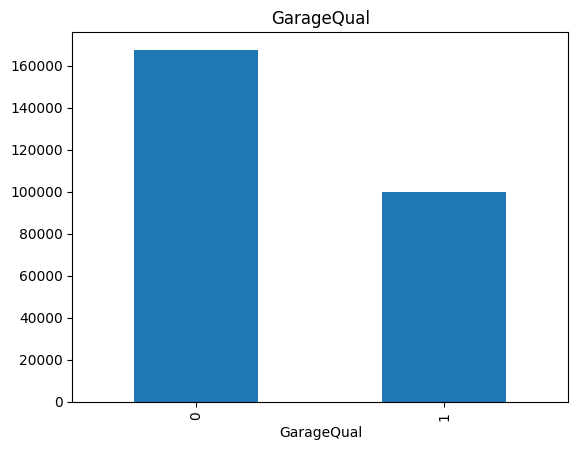

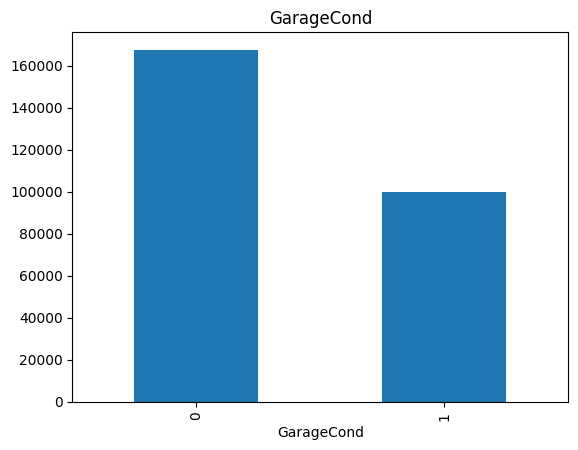

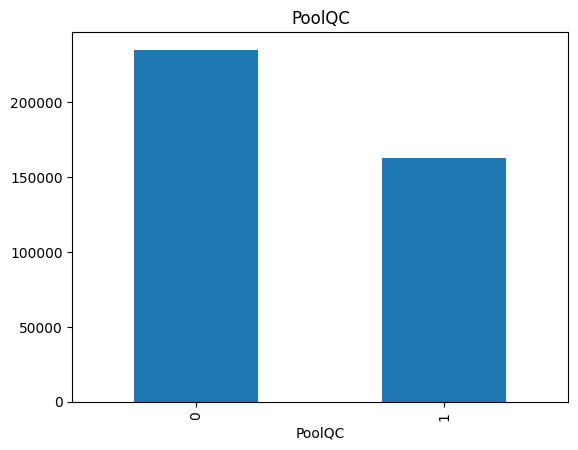

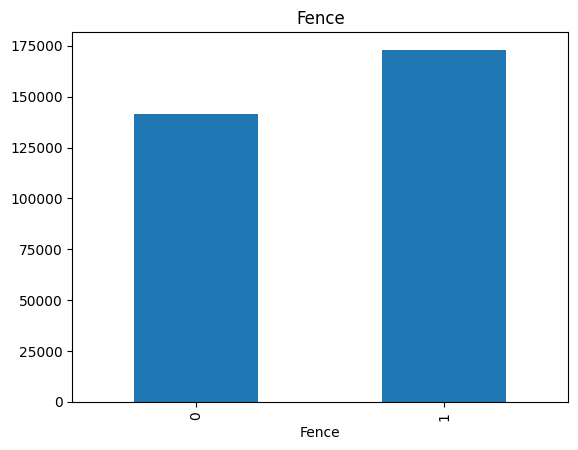

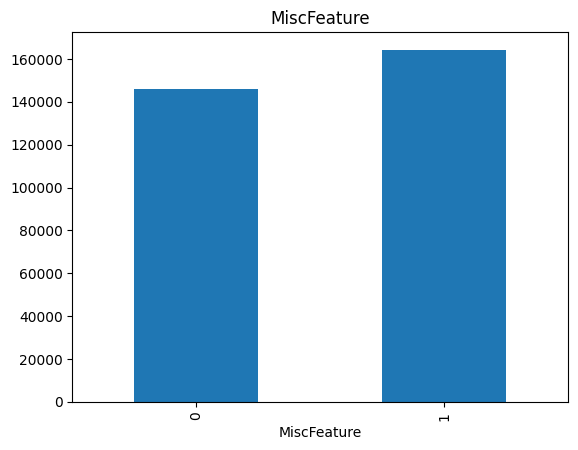

In [6]:
for feature in features_with_na:
    data=dataset.copy()

    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [7]:
num_features=dataset.select_dtypes(include='number')
num_features_col=num_features.columns.to_list()
num_features_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [8]:
year_feature=[feature for feature in num_features_col if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
discrete_feature=[feature for feature in num_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [10]:
continuous_feature=[feature for feature in num_features if feature not in discrete_feature+year_feature+['id']]

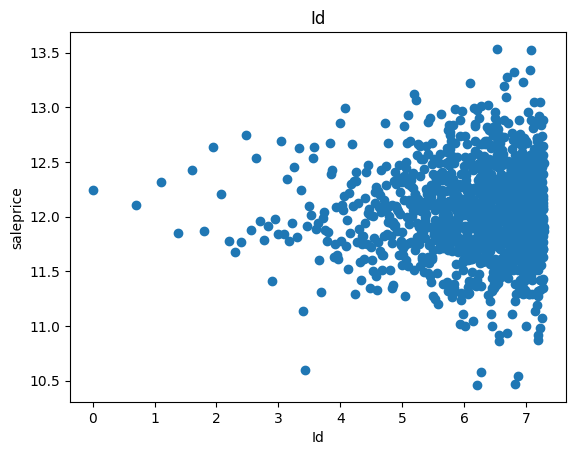

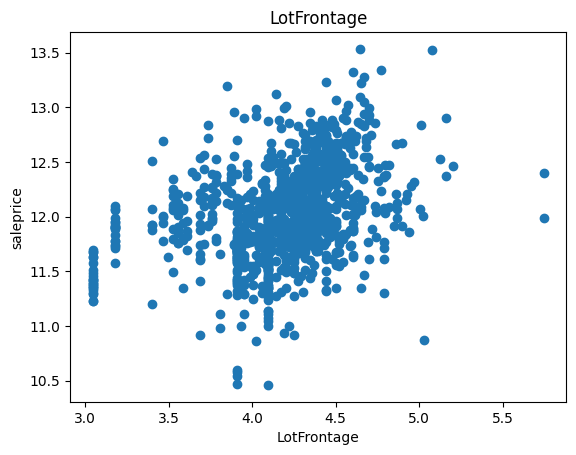

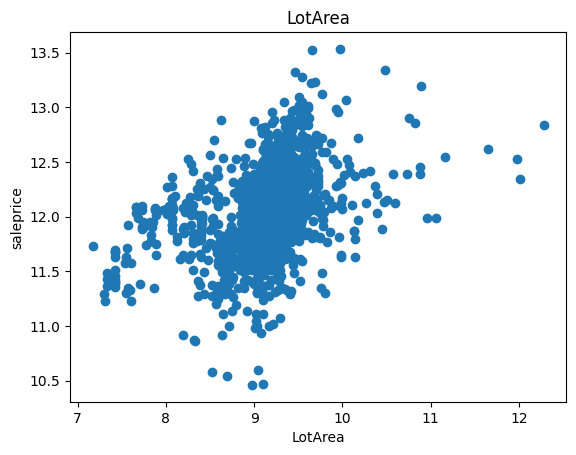

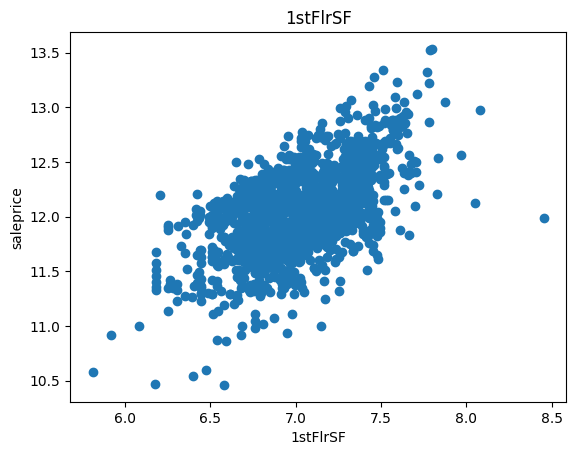

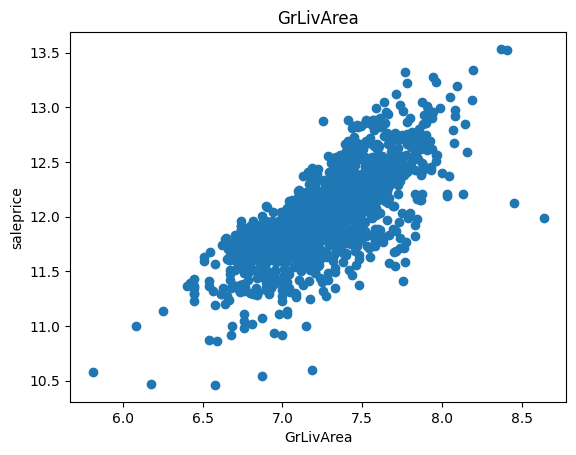

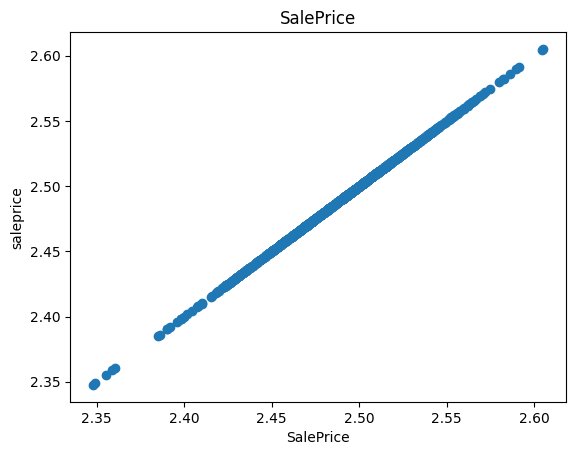

In [11]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('saleprice')
        plt.title(feature)
        plt.show()

In [12]:
cat_features=dataset.select_dtypes(include='object').columns.to_list()
cat_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
for feature in cat_features:
    print(f"the feature {feature} has {len(dataset[feature].unique())} categories")

the feature MSZoning has 5 categories
the feature Street has 2 categories
the feature Alley has 3 categories
the feature LotShape has 4 categories
the feature LandContour has 4 categories
the feature Utilities has 2 categories
the feature LotConfig has 5 categories
the feature LandSlope has 3 categories
the feature Neighborhood has 25 categories
the feature Condition1 has 9 categories
the feature Condition2 has 8 categories
the feature BldgType has 5 categories
the feature HouseStyle has 8 categories
the feature RoofStyle has 6 categories
the feature RoofMatl has 8 categories
the feature Exterior1st has 15 categories
the feature Exterior2nd has 16 categories
the feature MasVnrType has 4 categories
the feature ExterQual has 4 categories
the feature ExterCond has 5 categories
the feature Foundation has 6 categories
the feature BsmtQual has 5 categories
the feature BsmtCond has 5 categories
the feature BsmtExposure has 5 categories
the feature BsmtFinType1 has 7 categories
the feature Bsm

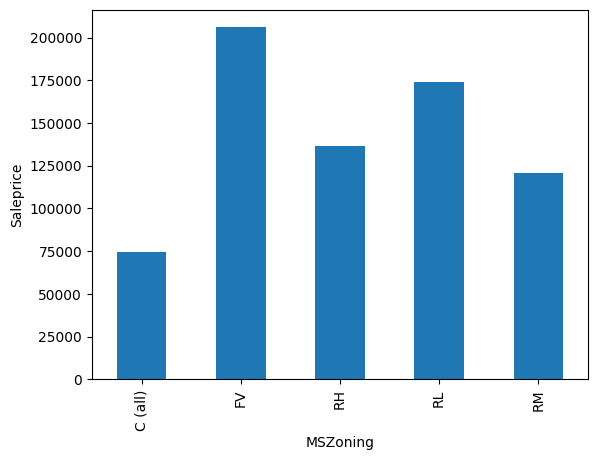

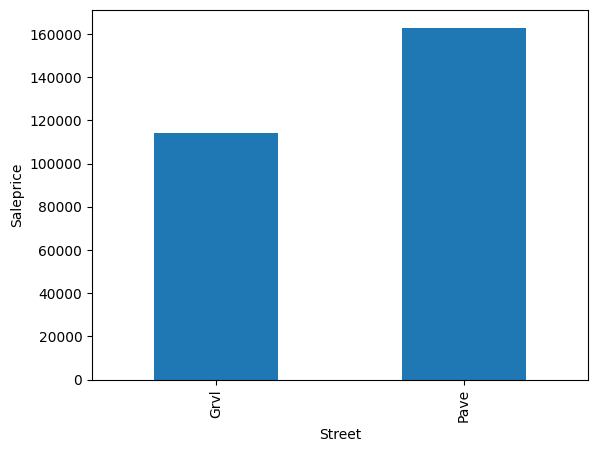

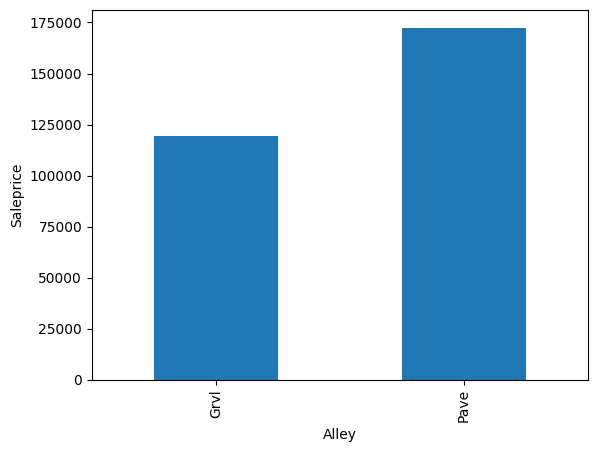

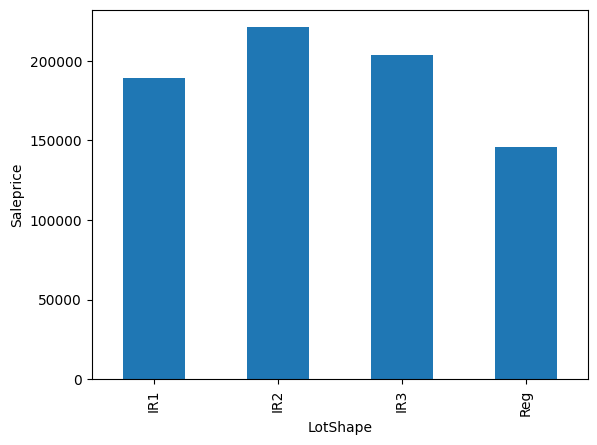

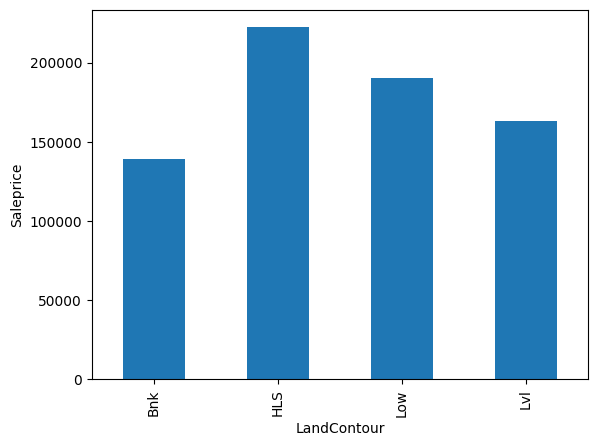

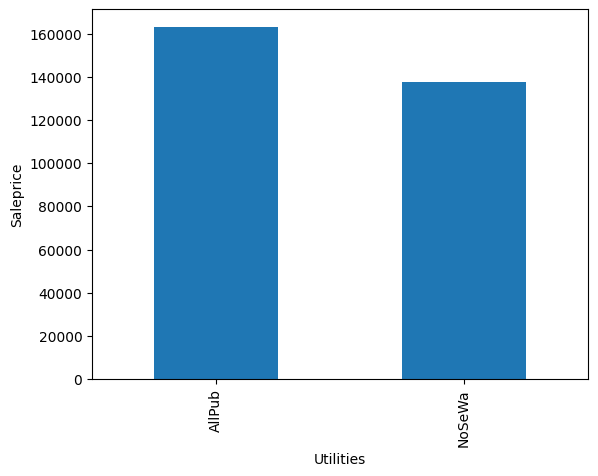

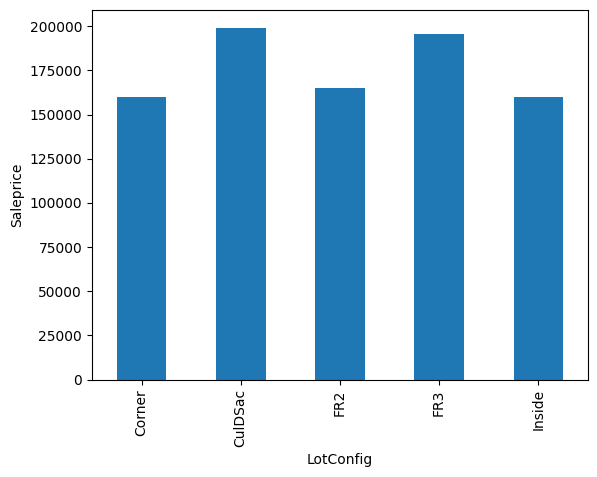

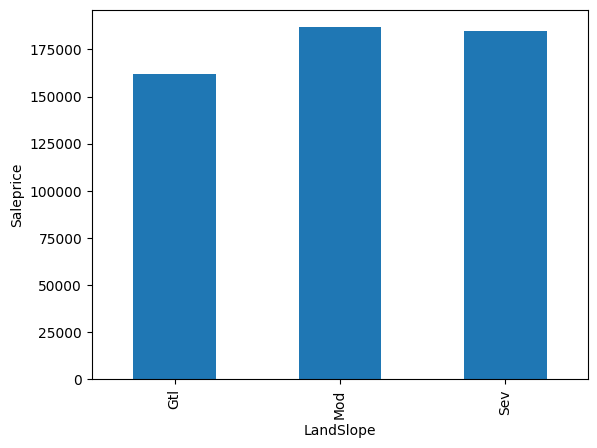

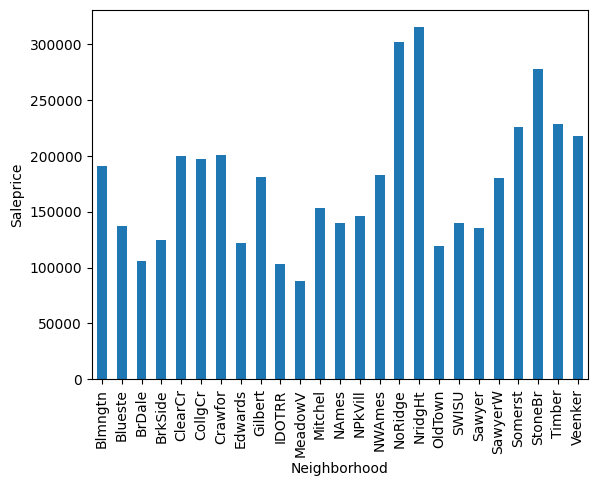

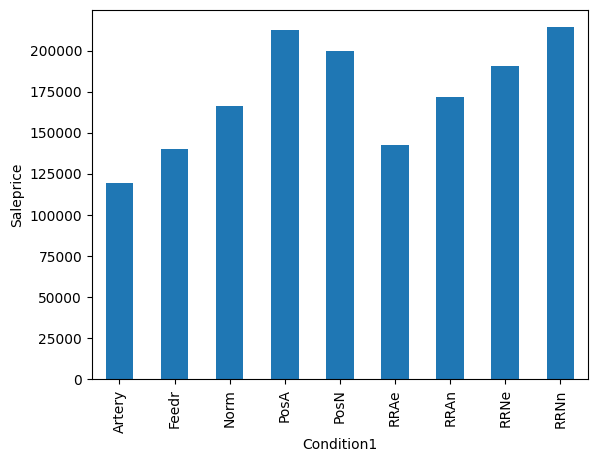

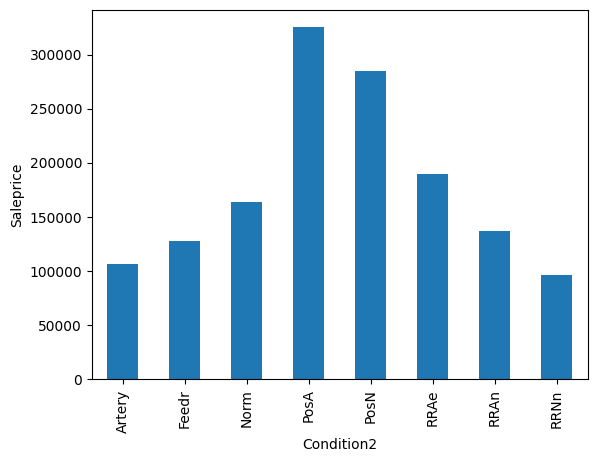

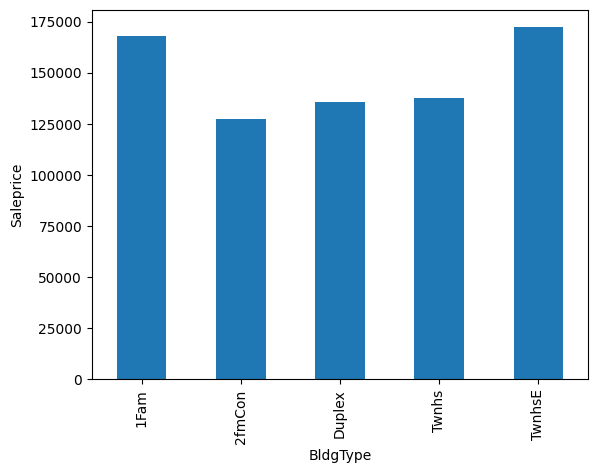

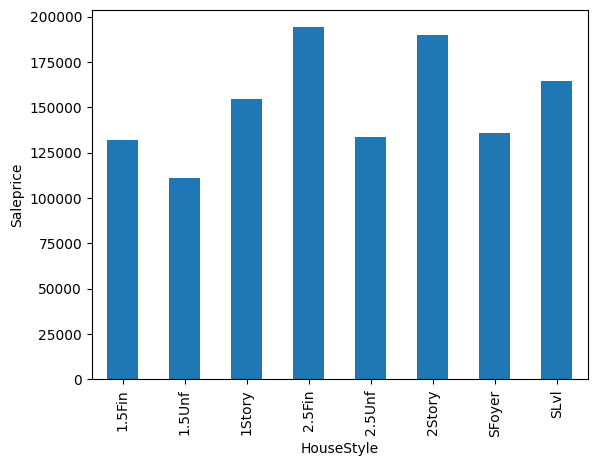

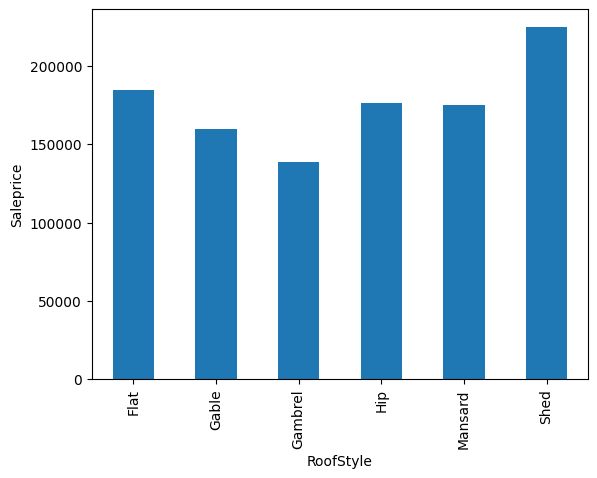

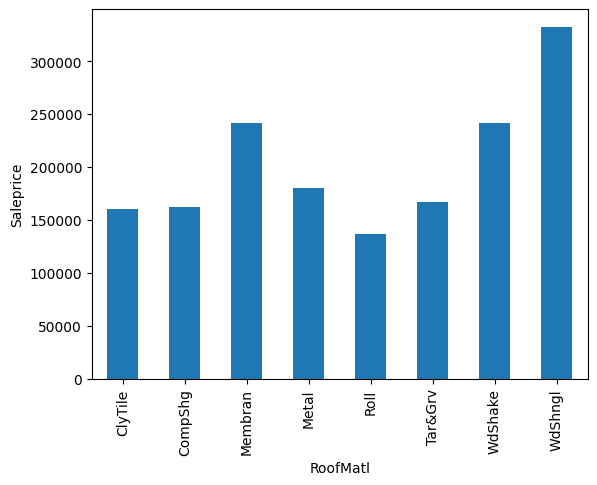

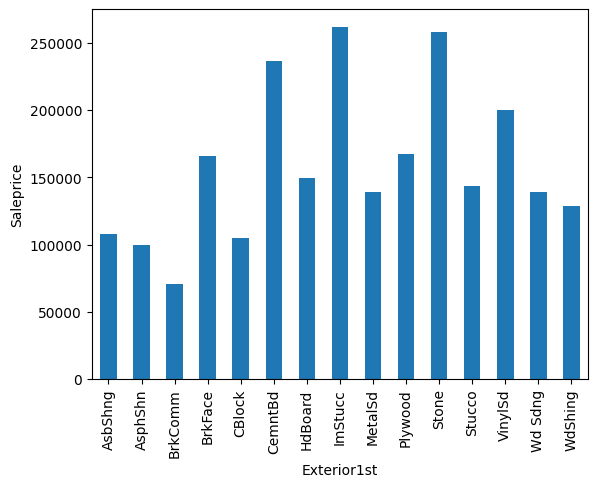

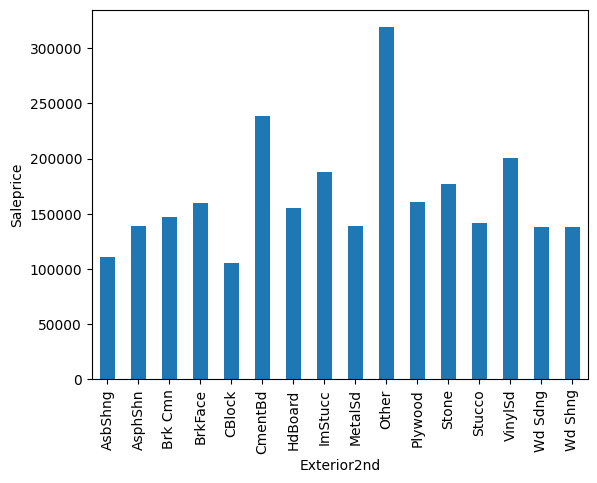

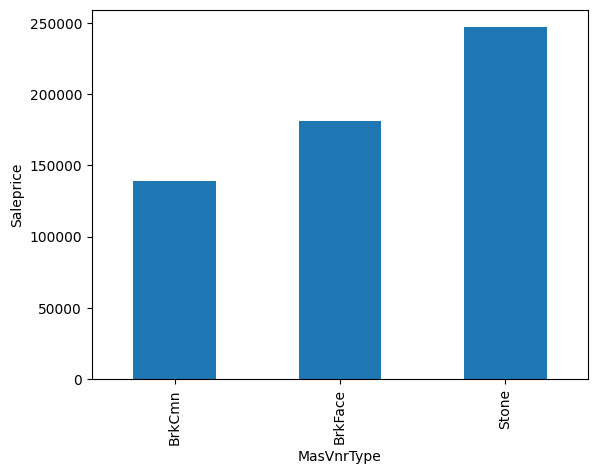

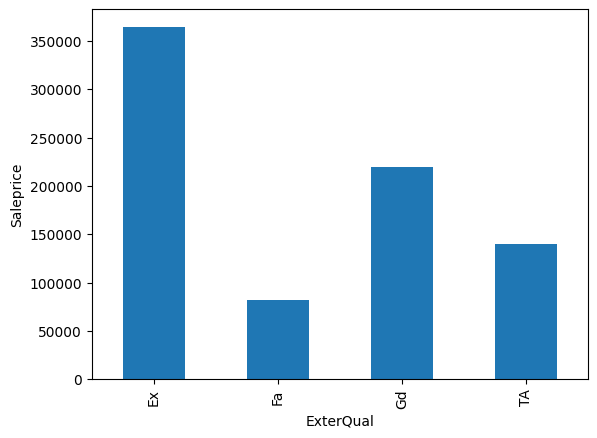

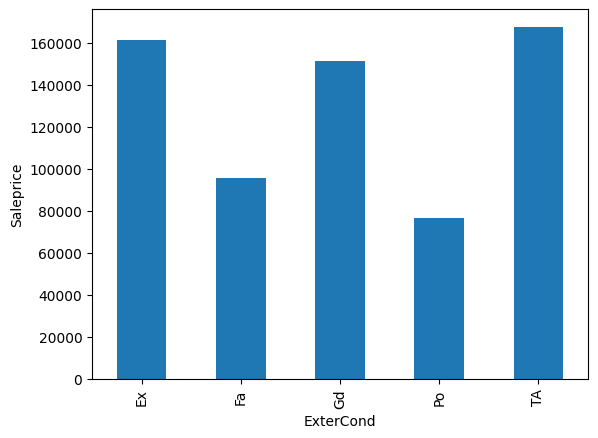

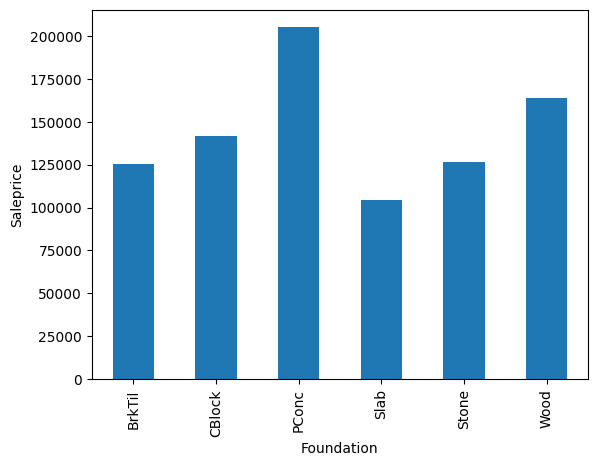

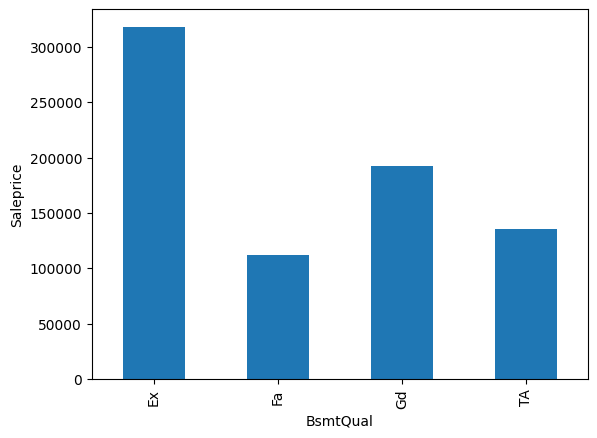

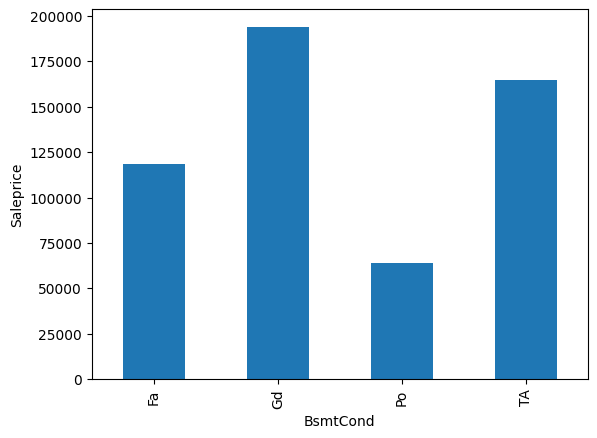

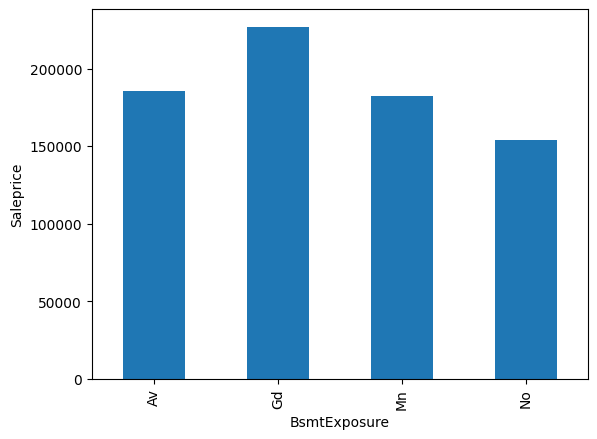

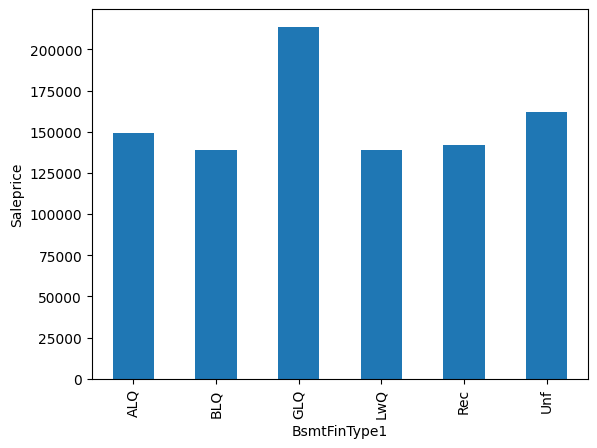

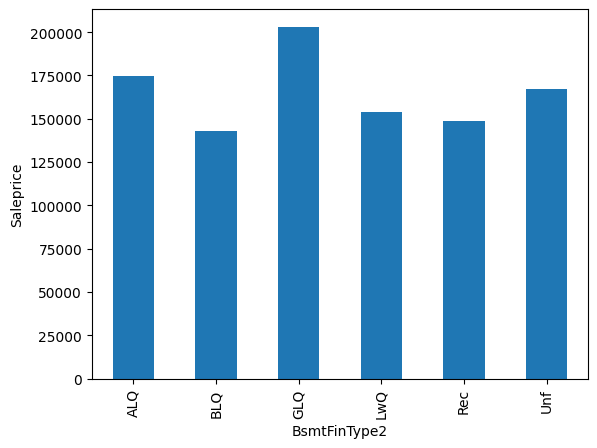

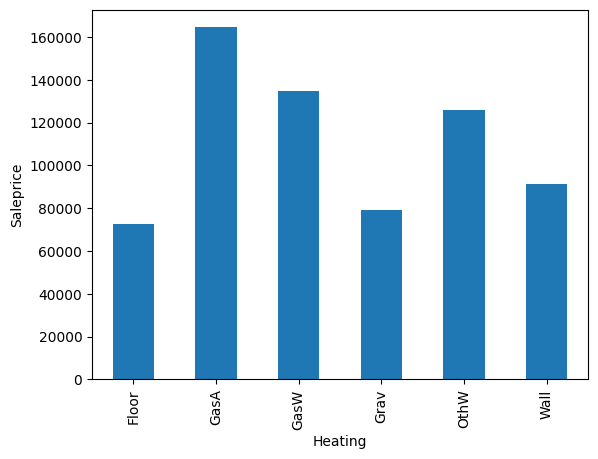

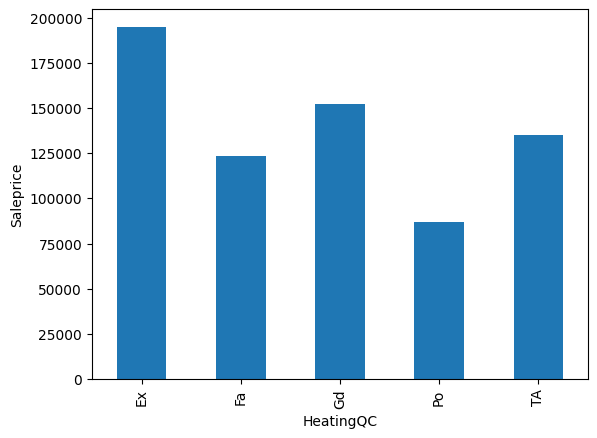

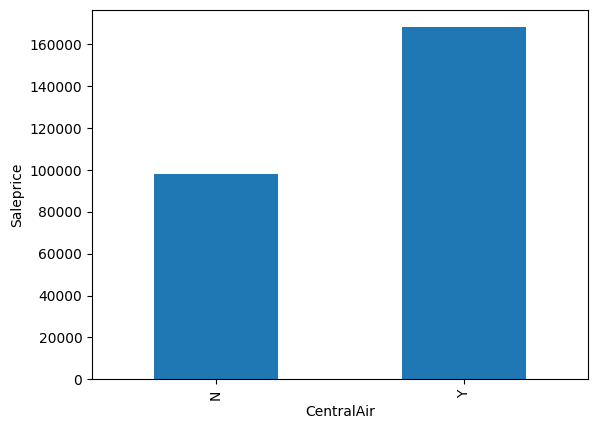

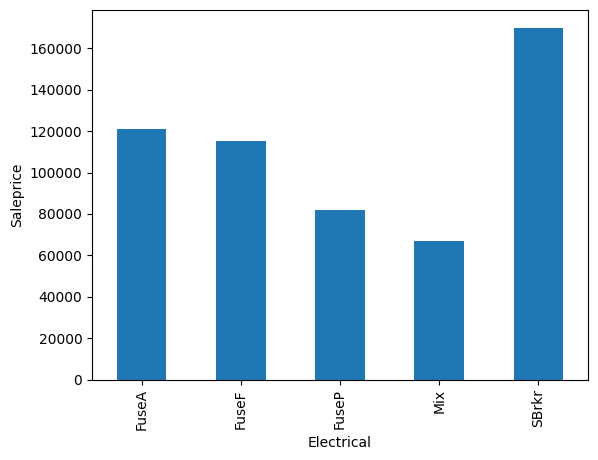

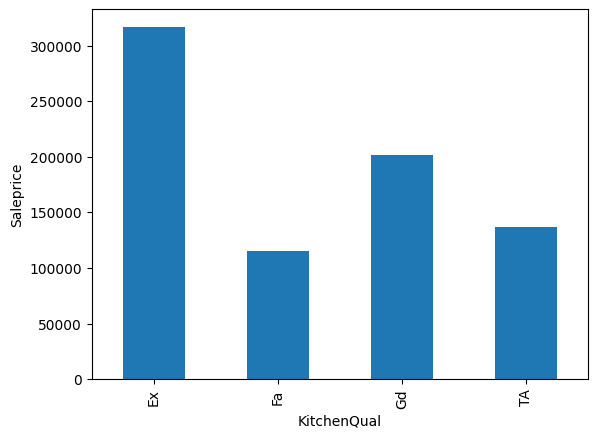

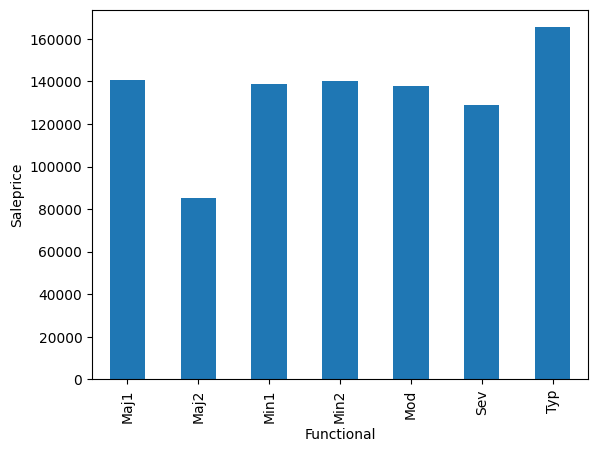

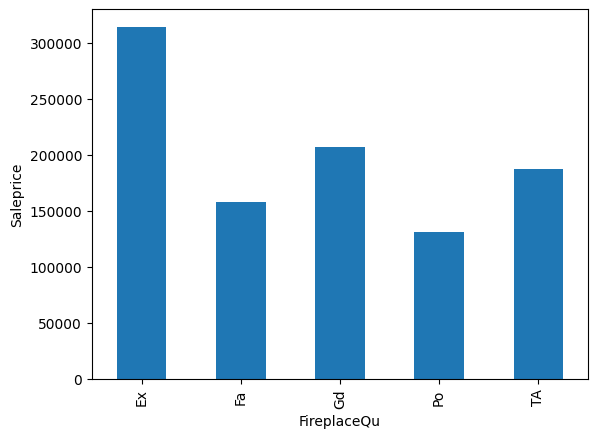

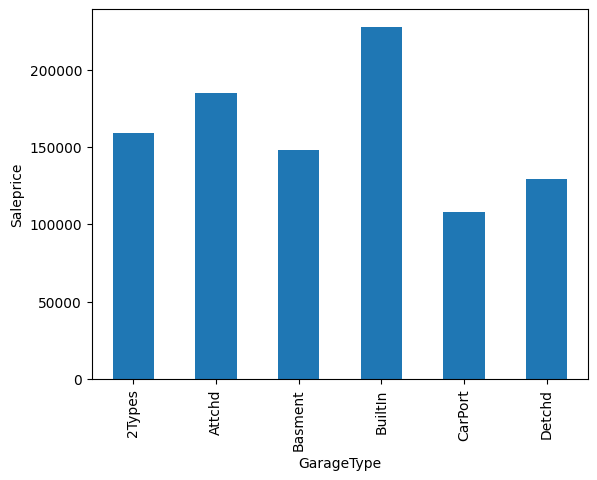

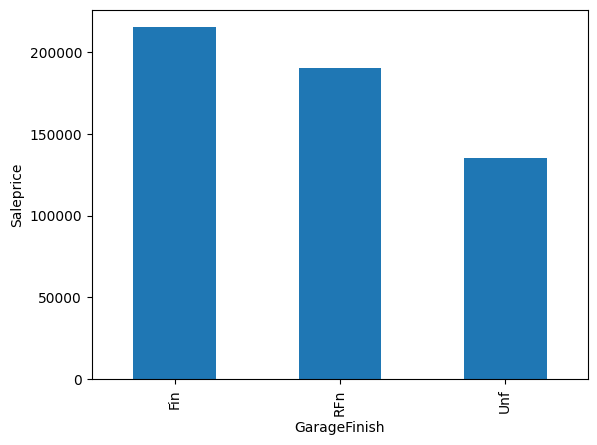

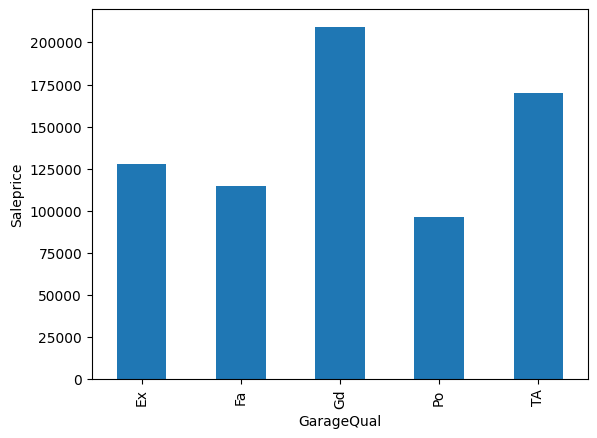

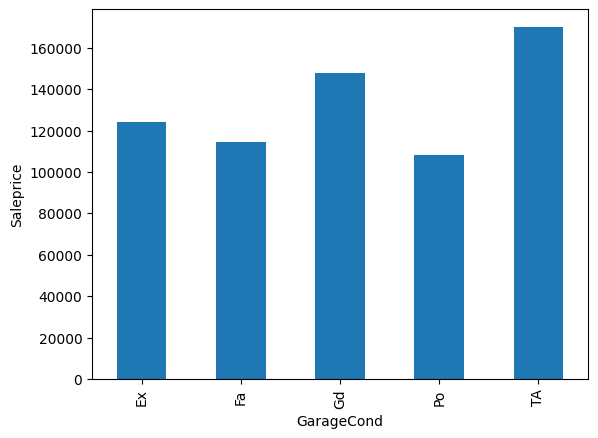

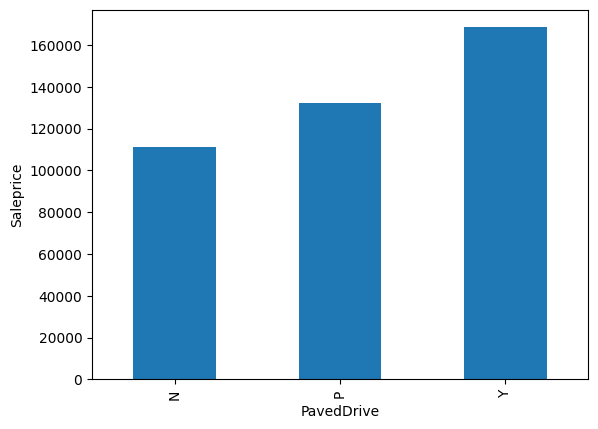

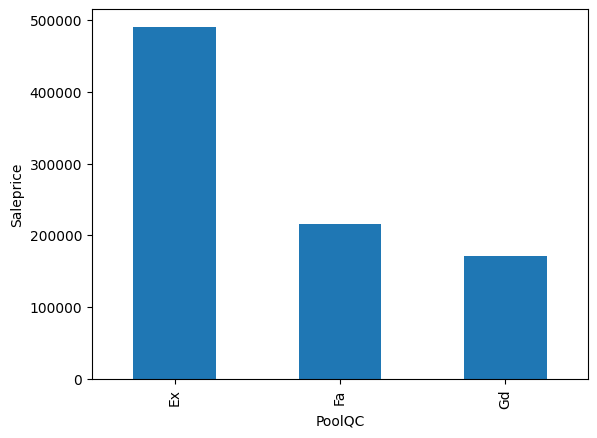

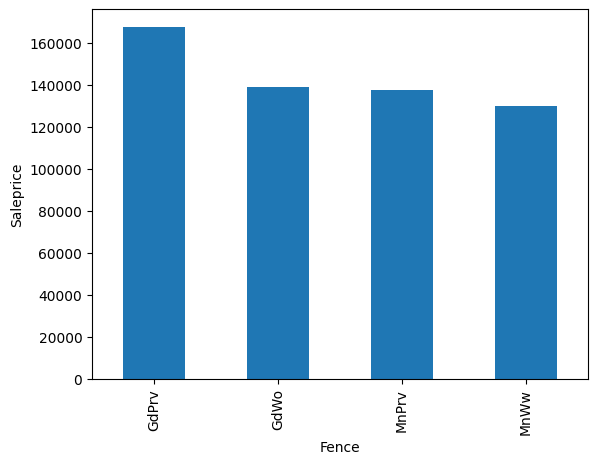

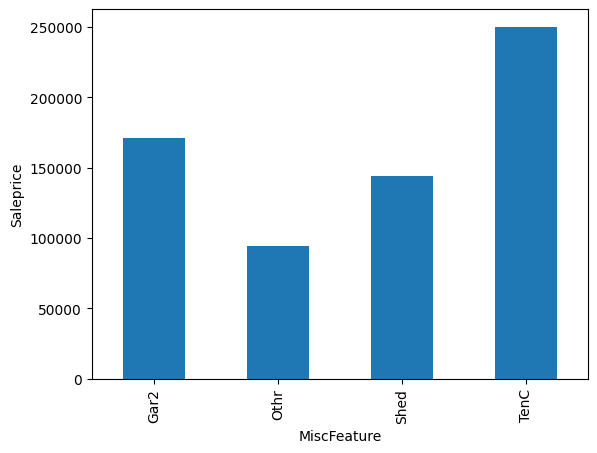

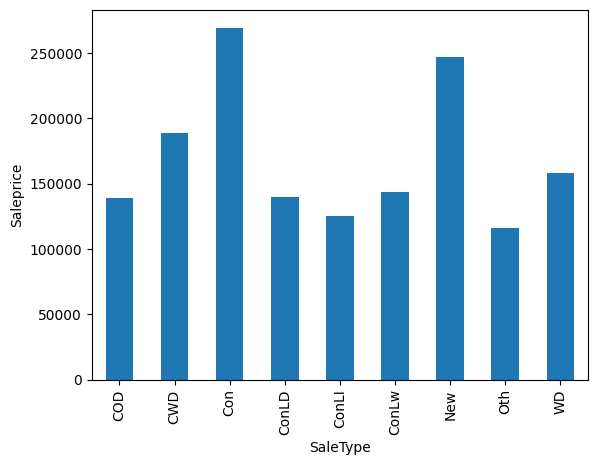

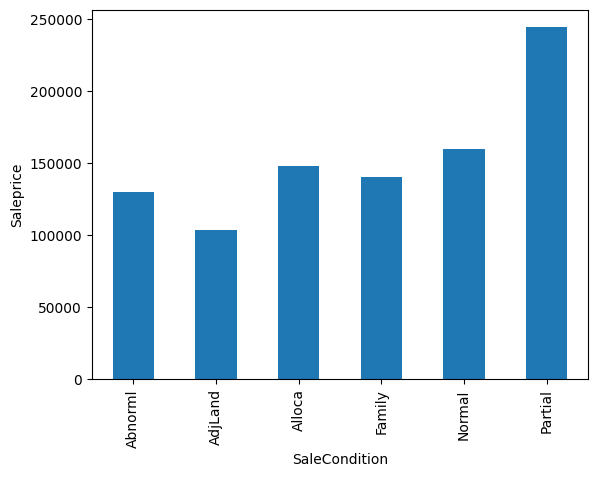

In [14]:
for feature in cat_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Saleprice')
    plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(dataset.drop(columns=['SalePrice']),dataset['SalePrice'],test_size=0.2,random_state=42)

In [16]:
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

In [17]:
def replace_cat_nan(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('missing')
    return data

dataset=replace_cat_nan(dataset,features_nan)
dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [18]:
num_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']
num_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [19]:
for feature in num_nan:
    median_val=dataset[feature].median()
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature]=dataset[feature].fillna(median_val)

dataset[num_nan].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [20]:
for feature in year_feature[:3]:
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [21]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [22]:
for feature in cat_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'rare_var')

In [23]:
feature_scale=[feature for feature in num_features if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(dataset[feature_scale])
scaler.transform(dataset[feature_scale])
dataset
feature_scale

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

In [24]:
data=pd.concat([dataset.drop(columns=feature_scale).reset_index(drop=True),
                   pd.DataFrame(scaler.fit_transform(dataset[feature_scale]),columns=feature_scale)],axis=1)
dataset=data
data

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,LotFrontage,LotArea,1stFlrSF,GrLivArea
0,1,60,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,12.247694,0,0,0,0.418208,0.366344,0.356155,0.577712
1,2,20,RL,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,12.109011,0,0,0,0.495064,0.391317,0.503056,0.470245
2,3,60,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,12.317167,0,0,0,0.434909,0.422359,0.383441,0.593095
3,4,70,RL,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,11.849398,0,0,0,0.388581,0.390295,0.399941,0.579157
4,5,60,RL,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,12.429216,0,0,0,0.513123,0.468761,0.466237,0.666523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,missing,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,694,0,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,8.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,missing,missing,missing,0,8,2007,WD,Normal,12.072541,0,0,0,0.400718,0.353592,0.396777,0.564433
1456,1457,20,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,0,0,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,32.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,missing,MnPrv,missing,0,2,2010,WD,Normal,12.254863,0,0,0,0.517503,0.453273,0.690872,0.645810
1457,1458,70,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,69,4,Gable,CompShg,CemntBd,CmentBd,missing,0.0,Ex,Gd,rare_var,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1152,0,0,0,2,0,4,1,Gd,9,Ty

In [25]:
for feature in cat_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [26]:
dataset

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,LotFrontage,LotArea,1stFlrSF,GrLivArea
0,1,60,3,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,854,0,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0,0.418208,0.366344,0.356155,0.577712
1,2,20,3,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,0,0,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0,0.495064,0.391317,0.503056,0.470245
2,3,60,3,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,866,0,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0,0.434909,0.422359,0.383441,0.593095
3,4,70,3,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,756,0,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0,0.388581,0.390295,0.399941,0.579157
4,5,60,3,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1053,0,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0,0.513123,0.468761,0.466237,0.666523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,1,2,0,1,1,0,0,13,2,1,3,5,6,5,8,7,0,0,10,10,1,0.0,1,3,4,3,3,1,5,0,5,0,953,953,2,4,1,3,694,0,0,0,2,1,3,1,1,7,4,1,3,4,8.0,2,2,460,2,3,2,0,40,0,0,0,0,0,4,2,0,8,2007,2,3,12.072541,0,0,0,0.400718,0.353592,0.396777,0.564433
1456,1457,20,3,1,2,0,1,1,0,0,12,2,1,3,3,6,6,32,22,0,0,7,7,3,119.0,1,3,2,3,3,1,4,790,2,163,589,1542,2,2,1,3,0,0,1,0,2,0,3,1,1,7,3,2,3,4,32.0,1,2,500,2,3,2,349,0,0,0,0,0,0,2,2,0,2,2010,2,3,12.254863,0,0,0,0.517503,0.453273,0.690872,0.645810
1457,1458,70,3,1,2,0,1,1,0,0,16,2,1,3,5,7,9,69,4,0,0,9,9,1,0.0,3,2,3,2,4,1,6,275,5,0,877,1152,2,4,1,3,1152,0,0,0,2,0,4,1,2,9,4,2,4,4,69.0,2,1,252,2,3,2,0,60,0,0,0,0,0,3,1,2500,5,2010,2,3,12.493130,0,0,0,0.423859,0.379597,0.480189,0.688669
1458,1459,20,3,1,2,0,1,1,0,0,8,2,1,3,3,5,6,60,14,2,0,4,3,1,0.0,1,3,2,2,3,2,6,49,2,1029,0,1078,2,3,1,2,0,0,1,0,1,0,2,1,2,5,4,0,1,4,60.0,1,1,240,2,3,2,366,0,112,0,0,0,0,4,2,0,4,2010,2,3,11.864462,0,0,0,0.434909,0.393688,0.443419,0.414497


In [33]:
dataset.to_csv('edacomplete.csv')

In [28]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [29]:
dataset


,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,LotFrontage,LotArea,1stFlrSF,GrLivArea
0,1,60,3,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,854,0,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0,0.418208,0.366344,0.356155,0.577712
1,2,20,3,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,0,0,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0,0.495064,0.391317,0.503056,0.470245
2,3,60,3,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,866,0,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0,0.434909,0.422359,0.383441,0.593095
3,4,70,3,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,756,0,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0,0.388581,0.390295,0.399941,0.579157
4,5,60,3,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1053,0,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0,0.513123,0.468761,0.466237,0.666523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,1,2,0,1,1,0,0,13,2,1,3,5,6,5,8,7,0,0,10,10,1,0.0,1,3,4,3,3,1,5,0,5,0,953,953,2,4,1,3,694,0,0,0,2,1,3,1,1,7,4,1,3,4,8.0,2,2,460,2,3,2,0,40,0,0,0,0,0,4,2,0,8,2007,2,3,12.072541,0,0,0,0.400718,0.353592,0.396777,0.564433
1456,1457,20,3,1,2,0,1,1,0,0,12,2,1,3,3,6,6,32,22,0,0,7,7,3,119.0,1,3,2,3,3,1,4,790,2,163,589,1542,2,2,1,3,0,0,1,0,2,0,3,1,1,7,3,2,3,4,32.0,1,2,500,2,3,2,349,0,0,0,0,0,0,2,2,0,2,2010,2,3,12.254863,0,0,0,0.517503,0.453273,0.690872,0.645810
1457,1458,70,3,1,2,0,1,1,0,0,16,2,1,3,5,7,9,69,4,0,0,9,9,1,0.0,3,2,3,2,4,1,6,275,5,0,877,1152,2,4,1,3,1152,0,0,0,2,0,4,1,2,9,4,2,4,4,69.0,2,1,252,2,3,2,0,60,0,0,0,0,0,3,1,2500,5,2010,2,3,12.493130,0,0,0,0.423859,0.379597,0.480189,0.688669
1458,1459,20,3,1,2,0,1,1,0,0,8,2,1,3,3,5,6,60,14,2,0,4,3,1,0.0,1,3,2,2,3,2,6,49,2,1029,0,1078,2,3,1,2,0,0,1,0,1,0,2,1,2,5,4,0,1,4,60.0,1,1,240,2,3,2,366,0,112,0,0,0,0,4,2,0,4,2010,2,3,11.864462,0,0,0,0.434909,0.393688,0.443419,0.414497


In [30]:
X_train=dataset.drop(columns=['SalePrice','Id'])
y_train=dataset['SalePrice']

In [31]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.05,random_state=0))
feature_sel_model.fit(X_train,y_train)

,estimator,Lasso(alpha=0...andom_state=0)
,threshold,None
,prefit,False
,norm_order,1
,max_features,None
,importance_getter,'auto'
,alpha,0.05
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000


In [32]:
feature_sel_model.get_support()

array([ True, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])